# Importing dependencies

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset

In [ ]:
url = "https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv"
df = pd.read_csv(url)

# Viewing the dataset and its details

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 12)

Viewing info about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Thus we see that there are no null values.

Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

# Some Data PreProcessing

Removing unnecessary columns

In [ ]:
df = df.drop('Unnamed: 0' , axis = 1)

Coverting RAM and Weight to numeric type

In [ ]:
df['Ram'] = (df['Ram'].str.replace('GB' , '')).astype(int)
df['Weight'] = (df['Weight'].str.replace('kg' , '')).astype(float)

# Analysing the Company column

Visualising the frequency of different companies

<Axes: >

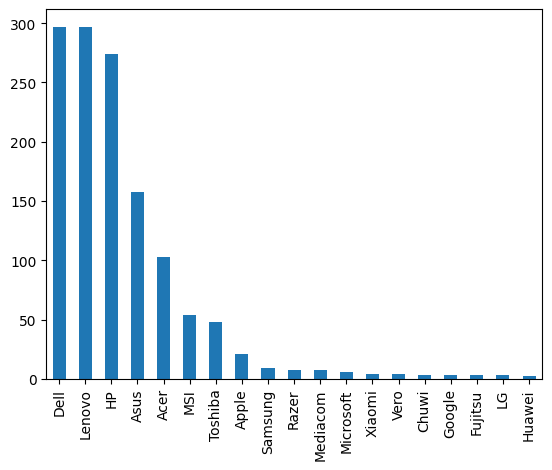

In [ ]:
df['Company'].value_counts().plot(kind = 'bar')

Average Price of each brand

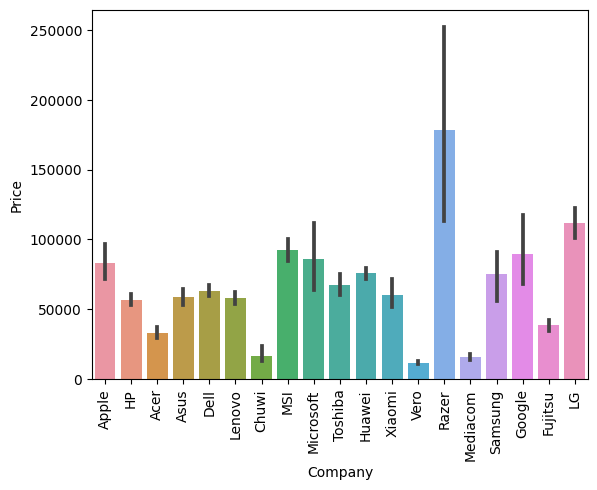

In [ ]:
sns.barplot(x = df['Company'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# Analysing the TypeName column

Different types of laptops

<Axes: >

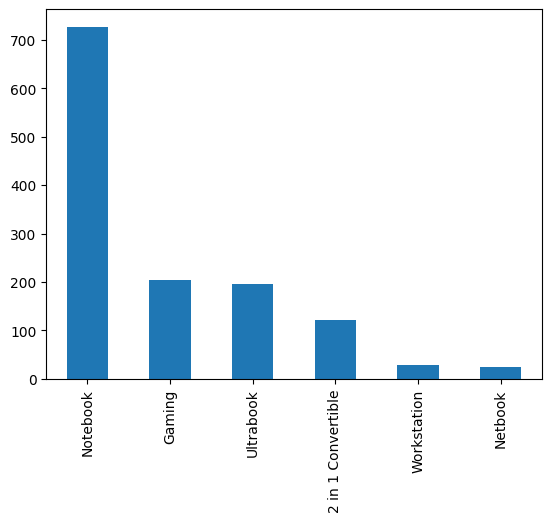

In [ ]:
df['TypeName'].value_counts().plot(kind = 'bar')

Average price of each type

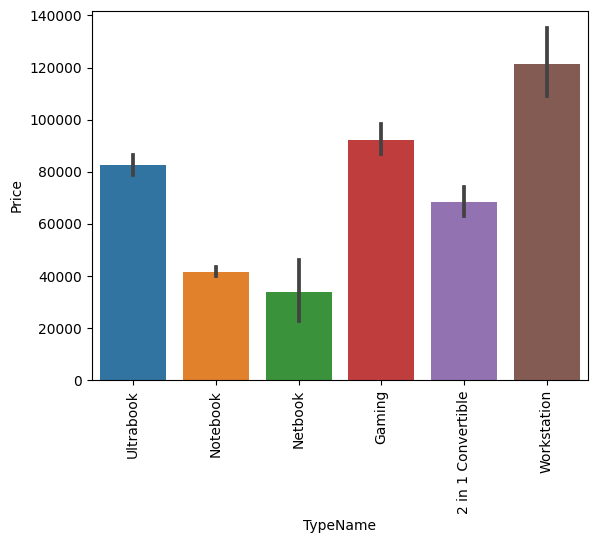

In [ ]:
sns.barplot(x = df['TypeName'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# Analysing the Inches column

Quantity of each size

<ipython-input-128-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

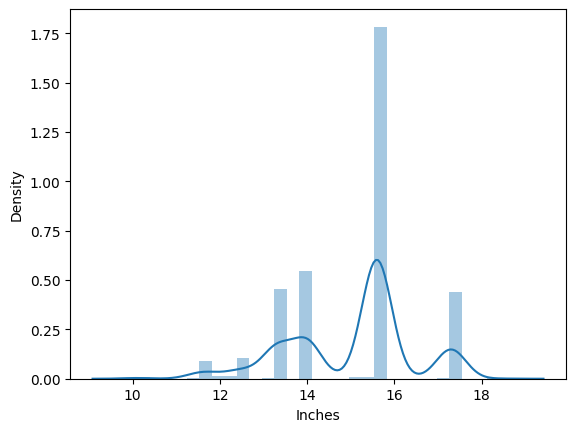

In [ ]:
sns.distplot(df['Inches'])

Correlation between Price and Size

<Axes: xlabel='Inches', ylabel='Price'>

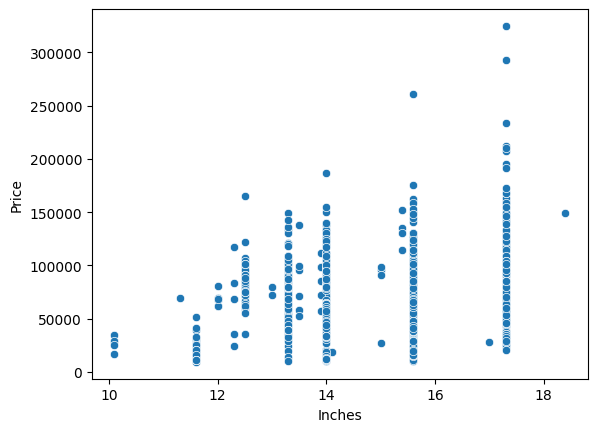

In [ ]:
sns.scatterplot(y = df['Price'] , x = df['Inches'])

# Analysing Screen Resolution

Value Counts

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Making a Touchscreen attribute

In [ ]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

Analysing TouchScreen attribute

In [ ]:
df['TouchScreen'].value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

Relation with price

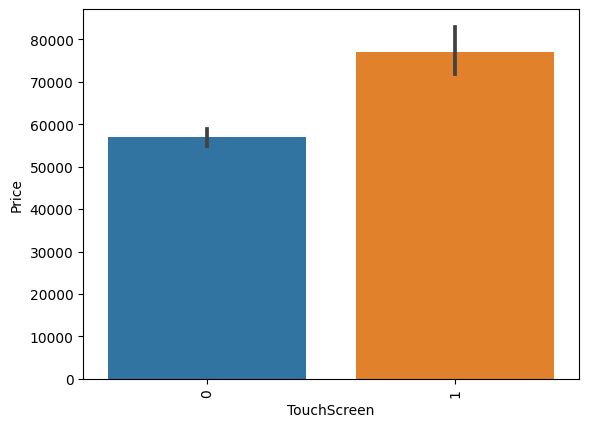

In [ ]:
sns.barplot(x = df['TouchScreen'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Making a new attribute for IPS Panels

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

Relation with price

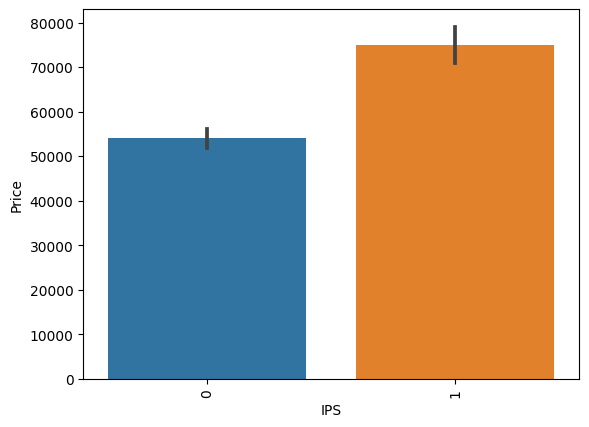

In [ ]:
sns.barplot(x = df['IPS'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Making the X and Y resolution columns

In [ ]:
newdf = df['ScreenResolution'].str.split('x' , n = 1 , expand = True)

In [ ]:
newdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [ ]:
a = (newdf[0]).astype(str)
df['X_res'] = (a.str[-4:]).astype(int)
df['Y_res'] = (newdf[1]).astype(int)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


Checking correlation of each numerical column

In [ ]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

Making a new PPI column since Inches does not have a high correlation with Price

In [ ]:
df['PPI'] = (((df['X_res'] ** 2) + (df['Y_res'] ** 2)) ** 0.5) / df['Inches']

Checking correlation of this PPI column

In [ ]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

Thus we see PPI has a much higher correlation with price than inches

We shall now drop the Screen Resolution , Inches and X_res , Y_res columns.

In [ ]:
cols = ['ScreenResolution' , 'Inches' , 'X_res' , 'Y_res']
df = df.drop(cols , axis = 1)

# Analysing the CPU column

Value Counts

In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

We shall construct 5 categories : Intel i3 , i5, i7, others and non-Intel.

In [ ]:
df['CPU brand'] = df['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))
#first 3 words since those hold the name of the processor

Function to categorise

In [ ]:
def processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  elif text.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

In [ ]:
df['CPU brand'] = df['CPU brand'].apply(processor)

Relation of CPU brand with price

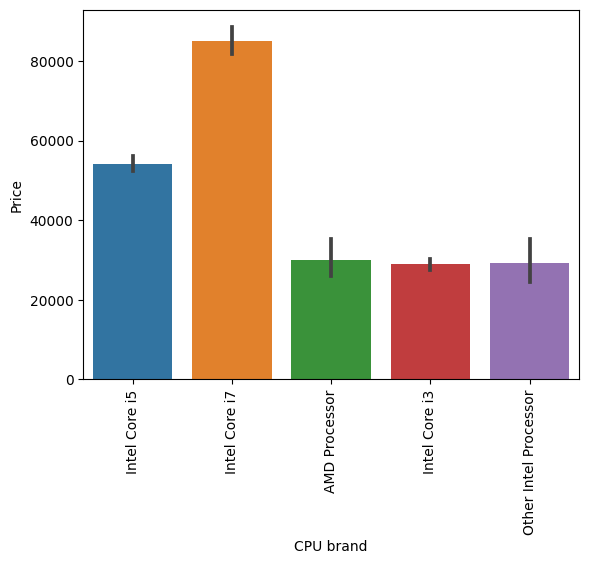

In [ ]:
sns.barplot(x = df['CPU brand'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Dropping the cpu column

In [ ]:
df = df.drop('Cpu' , axis = 1)

# Analysing RAM

Visualising value count

<Axes: >

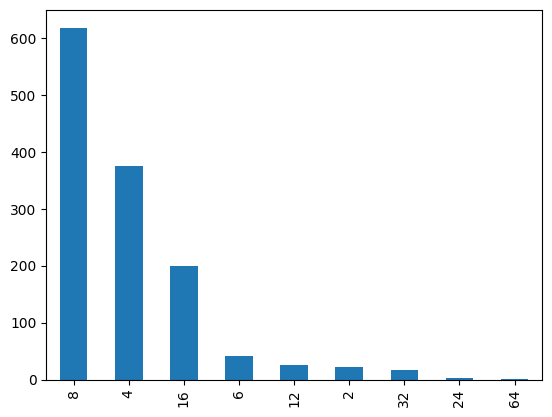

In [ ]:
df['Ram'].value_counts().plot(kind = 'bar')

Visualising relation with Price

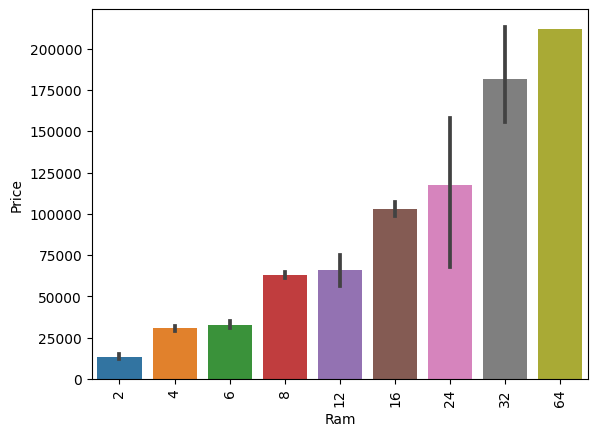

In [ ]:
sns.barplot(x = df['Ram'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# Analysing Memory Counts

Value Counts

In [ ]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

We shall make 4 different columns : SSD , HDD , Flash , Hybrid

Fixing the Memory string object

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
df["Memory"] = df["Memory"].str.replace('Flash Storage', 'Flash')

Splitting the memory into each type, and storing in a new dataframe

In [ ]:
new = df["Memory"].str.split("+", n = 1, expand = True)

In [ ]:
print(new)

              0     1
0       128 SSD  None
1     128 Flash  None
2       256 SSD  None
3       512 SSD  None
4       256 SSD  None
...         ...   ...
1298    128 SSD  None
1299    512 SSD  None
1300   64 Flash  None
1301   1000 HDD  None
1302    500 HDD  None

[1303 rows x 2 columns]


Extracting values from the new dataframe and fitting them correctly into our original dataframe df

In [ ]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["second"]= new[1]

In [ ]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash"] = df["first"].apply(lambda x: 1 if "Flash" in x else 0)

In [ ]:
df["second"].fillna("0", inplace = True)

In [ ]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash"] = df["second"].apply(lambda x: 1 if "Flash" in x else 0)

In [ ]:
df['first'] = df['first'].str.replace(r'\D', '')
df['second'] = df['second'].str.replace(r'\D', '')

<ipython-input-160-1a948b42e7e9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-160-1a948b42e7e9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [ ]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [ ]:
df["HDD"] = (df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"] = (df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"] = (df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash"] = (df["first"]*df["Layer1Flash"]+df["second"]*df["Layer2Flash"])

Deleting all the extra columns formed in the process

In [ ]:
cols = ["first" , "second" , "Memory" , "Layer1HDD" , "Layer2HDD" , "Layer2SSD" , "Layer1SSD" , "Layer2Hybrid" , "Layer1Hybrid" , "Layer2Flash" , "Layer1Flash"]
df = df.drop(cols , axis = 1)

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU brand,HDD,SSD,Hybrid,Flash
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


Checking correlation of these new columns with price

In [ ]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
PPI            0.473487
HDD           -0.096441
SSD            0.670799
Hybrid         0.007989
Flash         -0.040511
Name: Price, dtype: float64

Dropping Hybrid and Flash because of their low correlation

In [ ]:
df = df.drop(["Hybrid" , "Flash"] , axis = 1)

# Analysing the GPU column

Value counts

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

We shall only extract brand name since there are too many categories.

In [ ]:
df['GPU Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [ ]:
df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Brand, dtype: int64

Removing the ARM brand since there is only one laptop with that brand

In [ ]:
df = df[df['GPU Brand'] != 'ARM']

Visualising brands relation with price

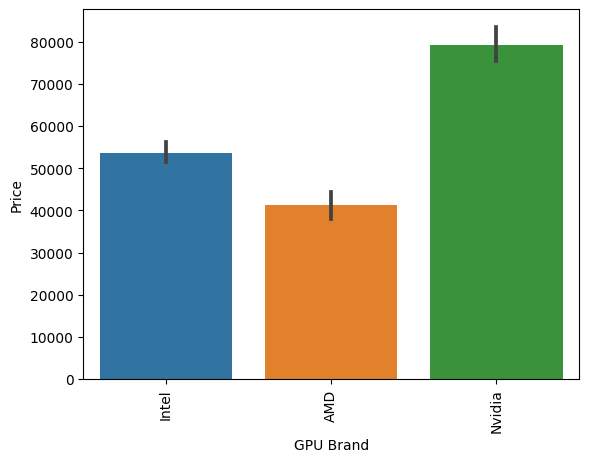

In [ ]:
sns.barplot(x = df['GPU Brand'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Dropping gpu column

In [ ]:
df = df.drop('Gpu' , axis = 1)

# Analysing OpSys column

Value Counts

In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

Combining all Windows OS in one category, macOS in another, and the others in a third.

In [ ]:
def os_types(x):
  if x == "Windows 10" or x == "Windows 10 S" or x == "Windows 7":
    return "Windows"
  elif x == "macOS" or x == "Mac OS X":
    return "macOS"
  else:
    return "Other"

In [ ]:
df['OpSys'] = df['OpSys'].apply(os_types)

In [ ]:
df['OpSys'].value_counts()

Windows    1125
Other       156
macOS        21
Name: OpSys, dtype: int64

Visualising relation with price

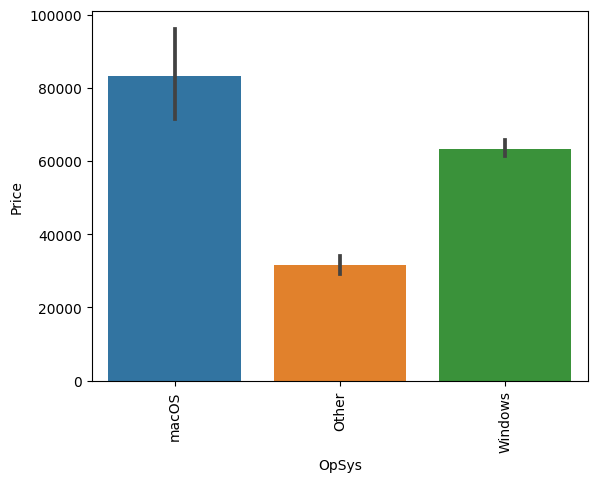

In [ ]:
sns.barplot(x = df['OpSys'] , y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# Analysing Weight attribute

Visualising relation with price

<Axes: xlabel='Weight', ylabel='Price'>

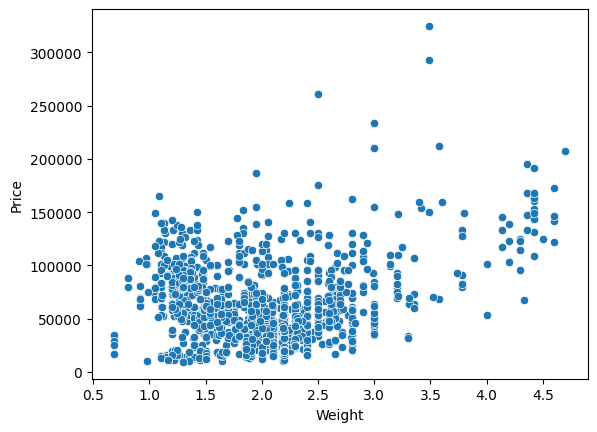

In [ ]:
sns.scatterplot(x = df["Weight"] , y = df["Price"])

# Analysing correlation of each column with the others

Heat Map

<Axes: >

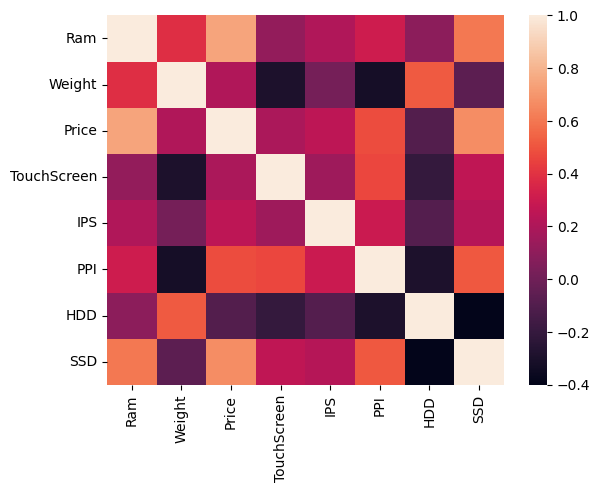

In [ ]:
sns.heatmap(df.corr())

# Analysing target column

Visualisation

<ipython-input-180-bd11fd8d838a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

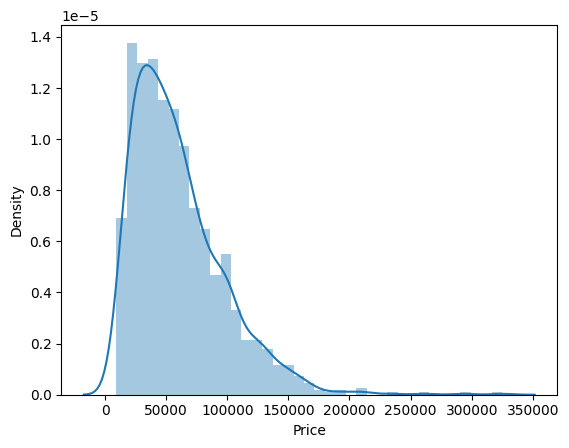

In [ ]:
sns.distplot(df["Price"])

Our target column is slightly skewed, therefore we will apply log transformation to it

<ipython-input-181-1c3cb0f863ff>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Price"]))


<Axes: xlabel='Price', ylabel='Density'>

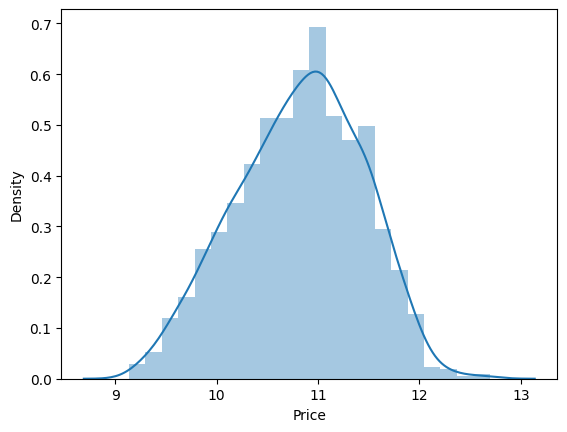

In [ ]:
sns.distplot(np.log(df["Price"]))

The log of Price is much more balanced.

# Evaluation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   float64
 6   TouchScreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   PPI          1302 non-null   float64
 9   CPU brand    1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  GPU Brand    1302 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 142.4+ KB


Taking the independent and dependent attributes separately

In [ ]:
x = df.drop("Price" , axis = 1)
y = np.log(df["Price"])

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

# Encoding the categorical columns + Applying models

Importing the necessary modules

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error

Creating the Pipeline Step 1

In [ ]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf' , OneHotEncoder(sparse = False , drop = 'first') , [0 , 1 , 3 , 8 , 11])
    ] ,
    remainder = 'passthrough')

# Linear Regression

In [ ]:
lin = LinearRegression()

In [ ]:
pipe = Pipeline([
    ('step1',step1) ,
    ('step2' , lin)
    ])
pipe.fit(x_train , y_train)
y_pred = pipe.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy Score

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.753452423434173
MAE 0.22596740171690213


# KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 11)

In [ ]:
pipe = Pipeline([
    ('step1', step1) ,
    ('step2', knn)
    ])
pipe.fit(x_train , y_train)
y_pred = pipe.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy Score

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7244115743904302
MAE 0.24767887600937938


# Decision Tree

In [ ]:
dectree = DecisionTreeRegressor(max_depth=8)

In [ ]:
pipe = Pipeline([
    ('step1',step1),
    ('step2', dectree)
])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy Score

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7837930874557698
MAE 0.22088330313089738


# SVM

In [ ]:
svrm = SVR(kernel='rbf',C=10000,epsilon=0.1)

In [ ]:
pipe = Pipeline([
    ('step1',step1),
    ('step2', svrm)
])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy Score

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8170067378022028
MAE 0.19995404793832572


# Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=2000,
                              random_state=0,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=15)

In [ ]:
pipe = Pipeline([
    ('step1',step1),
    ('step2', rfr)
])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy Score

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8547596149748705
MAE 0.17222980005823252


# Gradient Boosting

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=500)

In [ ]:
pipe = Pipeline([    ('step1',step1) ,    ('step2', gbr)])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy Score

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8640949440731913
MAE 0.16796570209530262


# Choosing the best model parameters

We see that Random Forest and Gradient Boost give the highest accuracies, so we shall fine tune the parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

Gradient Boosting Model

In [ ]:
param_grid = {'n_estimators' :[100 , 500 , 1000 , 5000]}
grid_model = GridSearchCV(estimator = gbr , param_grid = param_grid , scoring = 'neg_mean_squared_error' , cv=5 , verbose=1)
pipe = Pipeline([    ('step1',step1) ,    ('step2', grid_model)])
pipe.fit(x_train,y_train)
grid_model.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'n_estimators': 500}

Thus we see that the best parameter is the one that we already used in this case.

Random Forest Model

In [ ]:
param_grid = {'max_depth' :[15  , 10] ,
               'max_features' :[0.5 , 0.6 ],
              'random_state' : [i for i in (0,5)]}
grid_model = GridSearchCV(estimator = rfr , param_grid = param_grid , scoring = 'neg_mean_squared_error' , cv=3 , verbose=1)
pipe1 = Pipeline([    ('step1',step1) ,    ('step2', grid_model)])
pipe1.fit(x_train,y_train)
grid_model.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'max_depth': 15, 'max_features': 0.5, 'random_state': 5}

Here the best parameters are different, thus we check the accuracy of this model.

Checking accuracy of new rfr model.

In [ ]:
y_pred = pipe1.predict(x_test)

In [ ]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8530906116097108
MAE 0.17275843639099572


Since rfr still performs worse than gbr, we shall use gbr as our final model.

# Exporting the model

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))